# Group Index

## Group Index of Silicon Waveguide

This function returns group index of the fundamental mode for given waveguide width and wavelength.

Group Index is calculated using the following equation where $n_\mathrm{eff}$ is the effective index, $n_g$ is the group index, $w$ is the waveguide width, and $\lambda$ is the wavelength.

$$n_g(w, \lambda) =  n_\mathrm{eff}(w, \lambda) - \lambda \cdot  \frac{\partial n_\mathrm{eff}(w, \lambda)}{\partial \lambda}$$


This is what is implemented in the built-in function `ng`.

In [1]:
import sipkit
import matplotlib.pyplot as plt
from jax import numpy as jnp
from jax import numpy as jnp

%matplotlib inline

wavelengths = jnp.linspace(1.5, 1.6, 1000)
group_index_400 = jnp.array([sipkit.ng(0.4, wl) for wl in wavelengths])
group_index_450 = jnp.array([sipkit.ng(0.45, wl) for wl in wavelengths])
group_index_500 = jnp.array([sipkit.ng(0.5, wl) for wl in wavelengths])
group_index_550 = jnp.array([sipkit.ng(0.55, wl) for wl in wavelengths])
group_index_600 = jnp.array([sipkit.ng(0.6, wl) for wl in wavelengths])


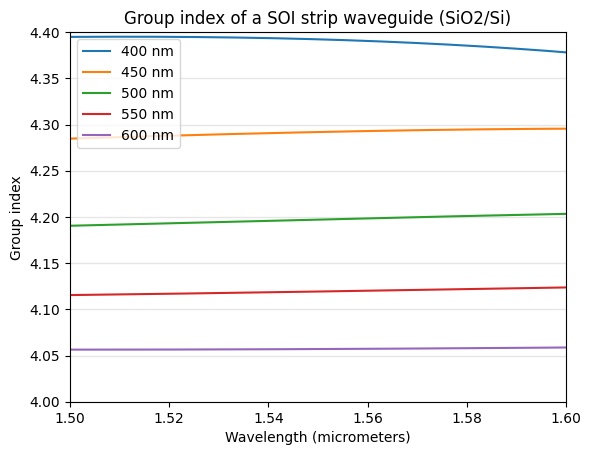

In [2]:
plt.plot(wavelengths, group_index_400, label='400 nm')
plt.plot(wavelengths, group_index_450, label='450 nm')
plt.plot(wavelengths, group_index_500, label='500 nm')
plt.plot(wavelengths, group_index_550, label='550 nm')
plt.plot(wavelengths, group_index_600, label='600 nm')
plt.legend()
plt.xlabel('Wavelength (micrometers)')
plt.ylabel('Group index')
plt.title('Group index of a SOI strip waveguide (SiO2/Si)')
plt.ylim(4.0, 4.4)
plt.xlim(1.5, 1.6)
plt.grid(axis='y', color='0.9', linestyle='-', linewidth=1)
plt.show()

## Free Spectral Range (FSR)

As an example, the group index can be used to calculate the free spectral range (FSR) of a resonator, the spectral spacing between two consecutive resonant wavelengths. The FSR can be expressed as the following equation where $L$ is the round-trip cavity length, $\lambda$ is the wavelength, and $n_g$ is the group index.

$$FSR = \frac{\lambda^2}{n_{g}L}$$

In [3]:
def fsr(width, wavelength, length):
    """
    Calculates the free spectral range of a waveguide. This is the distance
    between two consecutive resonances.
    :param width: Waveguide width in micrometers.
    :param wavelength: Wavelength in micrometers.
    :param length: Propagation length in micrometers.
    :return: Free spectral range in micrometers.
    """
    return wavelength ** 2 / (sipkit.ng(width, wavelength) * length)


my_fsr = fsr(width=0.5, wavelength=1.55, length=30)
my_fsr

Array(0.0190803, dtype=float64)